In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Loading datasets
training_data = pd.read_csv("data/train_data.csv")
test_data = pd.read_csv("data/test_data.csv")

**Correlation Evaluation**  
  
The .corr() function alone was used to determine whether the correlation between the target and the feature variables is linear.  
To evaluate if the correlation between the feature and target variables is quadratic/non-linear, apart from the .corr() function, the feature variables where squared. Generative AI was used here. Below is the prompt.  
ChatGPT prompt: *Correlation analysis for quadratic relationship between feature vs target*

In [3]:
# Combine dataset to see correlation between features & targets
full_dataset = pd.concat([training_data, test_data], ignore_index=True)

correlation = full_dataset["tavg"].corr(full_dataset["Max_Demand_GW"])
print(f"Linear Correlation of Average Temp. vs Max_Demand_GW: {correlation}")

correlation = full_dataset["Population_k"].corr(full_dataset["Max_Demand_GW"])
print(f"Linear Correlation of Population vs Max_Demand_GW: {correlation}")

correlation = (full_dataset["tavg"] ** 2).corr(full_dataset["Max_Demand_GW"])
print(f"Non-linear Correlation of Average Temp. vs Max_Demand_GW: {correlation}")

correlation = (full_dataset["Population_k"] ** 2).corr(full_dataset["Max_Demand_GW"])
print(f"Non-linear Correlation of Population vs Max_Demand_GW: {correlation}")

Linear Correlation of Average Temp. vs Max_Demand_GW: 0.44060560487234607
Linear Correlation of Population vs Max_Demand_GW: 0.5474161654856777
Non-linear Correlation of Average Temp. vs Max_Demand_GW: 0.4996957117221842
Non-linear Correlation of Population vs Max_Demand_GW: 0.5552684985583702


**Data Visualisation**  
  
After the above correlations did not show clear indications whether the correlation between the feature and target is linear or non-linear, scatter plots were used to evaluate better the correlation between the feature and target variables.

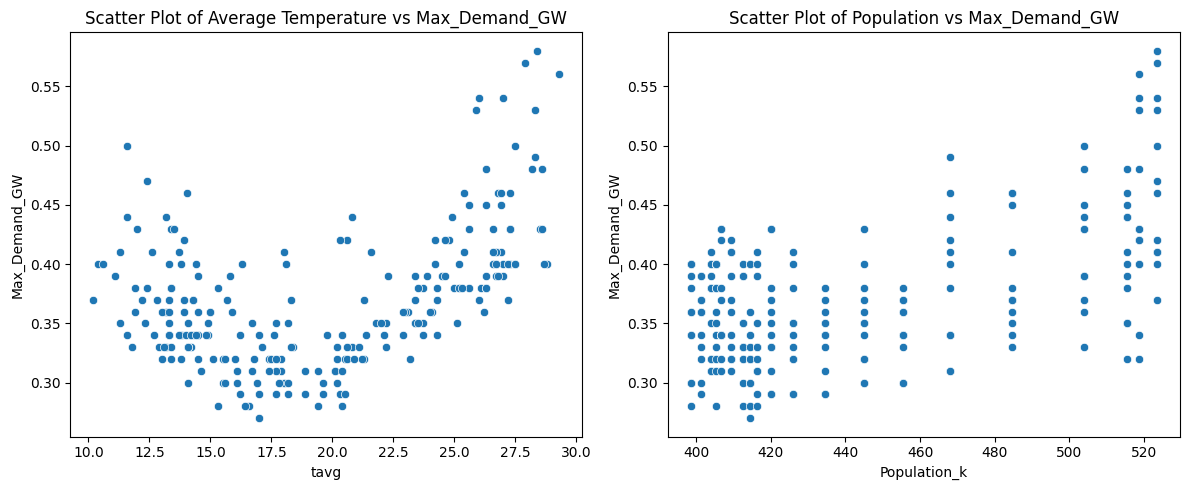

In [4]:
# Visualise to help determine wether relationships are quadratic or linear
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x="tavg", y="Max_Demand_GW", data=full_dataset, ax=axes[0])
axes[0].set_title("Scatter Plot of Average Temperature vs Max_Demand_GW")

sns.scatterplot(x="Population_k", y="Max_Demand_GW", data=full_dataset, ax=axes[1])
axes[1].set_title("Scatter Plot of Population vs Max_Demand_GW")

plt.tight_layout()
plt.show()

**Evaluating Models' Performances**  
  
Links used:  
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html  
https://www.kaggle.com/code/lxlz1986/polynomial-regression-in-scikit-learn

In [5]:
# Linear model
features = ["Population_k", "tavg"]
targets = ["Max_Demand_GW"]

linear_model = LinearRegression()
linear_model.fit(training_data[features], training_data[targets])

linear_model_max_demand_predictions = linear_model.predict(test_data[features])

print(f"Linear model R2 score: {r2_score(test_data[targets], linear_model_max_demand_predictions)}")

# Non-Linear model
polynomial_features = PolynomialFeatures(degree=2)

x_train_polynomial = polynomial_features.fit_transform(training_data[features])
nonlinear_model = LinearRegression()
nonlinear_model.fit(x_train_polynomial, training_data[targets])

x_test_polynomial = polynomial_features.fit_transform(test_data[features])
nonlinear_model_max_demand_predictions = nonlinear_model.predict(x_test_polynomial)

print(f"Non-Linear model R2 score: {r2_score(test_data[targets], nonlinear_model_max_demand_predictions)}")

Linear model R2 score: -0.2950862815399242
Non-Linear model R2 score: 0.24015645302459532


*The above evaluation shows that the selected features have a non-linear correlation with the target, therefor a polynomial regression is better suited.*

**Plot the Predictions vs True Values**

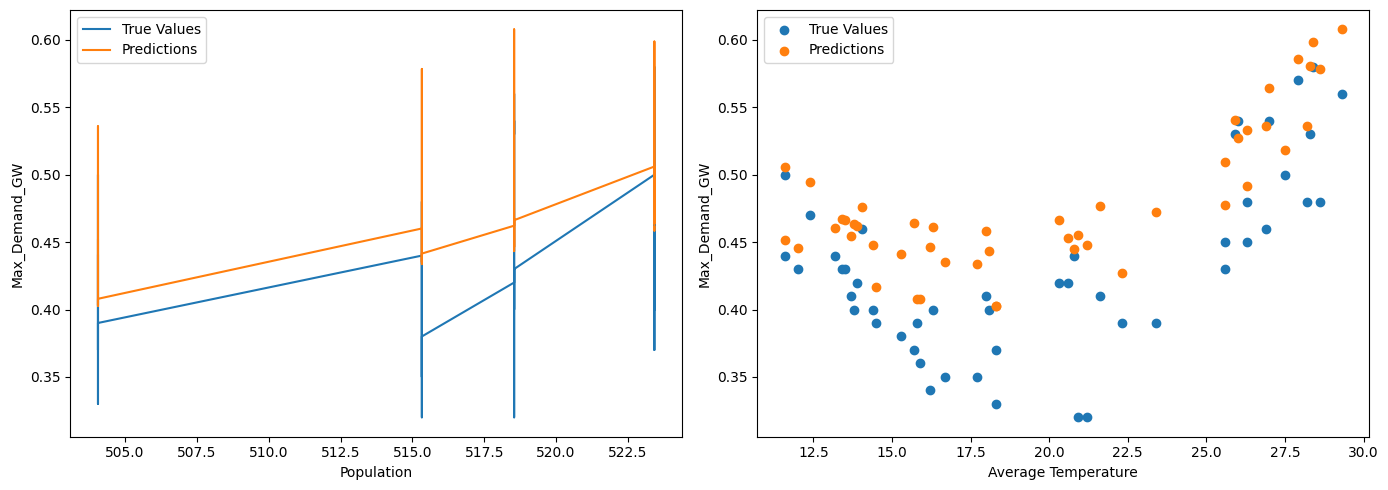

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(test_data[features[0]], test_data[targets], label="True Values")
axes[0].plot(test_data[features[0]], nonlinear_model_max_demand_predictions, label="Predictions")
axes[0].set_xlabel("Population")
axes[0].set_ylabel("Max_Demand_GW")
axes[0].legend()

axes[1].scatter(test_data[features[1]], test_data[targets], label="True Values")
axes[1].scatter(test_data[features[1]], nonlinear_model_max_demand_predictions, label="Predictions")
axes[1].set_xlabel("Average Temperature")
axes[1].set_ylabel("Max_Demand_GW")
axes[1].legend()

plt.tight_layout()
plt.show()

**Plot the True Values and Predicted Values of Max Demand over Time**

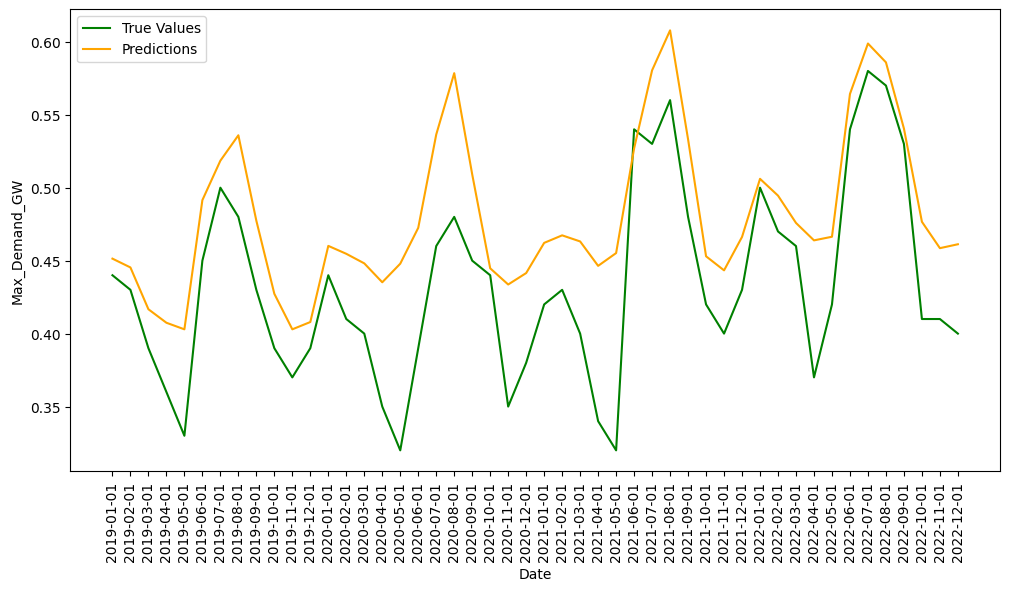

In [7]:
# Plot results
plt.figure(figsize=(12,6))
plt.plot(test_data["Date"], test_data["Max_Demand_GW"], color="green", label="True Values")
plt.plot(test_data["Date"], nonlinear_model_max_demand_predictions, color="orange", label="Predictions")
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Max_Demand_GW")
plt.legend()
plt.show()

**Calculating Different Metrics on the Non-Linear Model**  
  
For MAPE calculation: https://stackoverflow.com/questions/47648133/mape-calculation-in-python

In [8]:
# Calculating the MSE on the test dataset using the non-linear model
mse_test = mean_squared_error(test_data[targets], nonlinear_model_max_demand_predictions)
print(f"Mean Squared Error on test dataset: {mse_test}")

# Calculating the MAE on the test dataset using the non-linear model
mae_test= mean_absolute_error(test_data[targets], nonlinear_model_max_demand_predictions)
print(f"\nMean Absolute Error on test dataset: {mae_test}")

# Calculating the MAPE on the test dataset using the non-linear model
def mean_absolute_percentage_error(actual, predictions): 
    actual, predictions = np.array(actual), np.array(predictions)
    return np.mean(np.abs((actual - predictions) / actual)) * 100

mape = mean_absolute_percentage_error(test_data[targets], nonlinear_model_max_demand_predictions)
print(f"\nMAPE on test dataset: {mape:.2f}%")

Mean Squared Error on test dataset: 0.0032594122150465797

Mean Absolute Error on test dataset: 0.048161588049687815

MAPE on test dataset: 12.09%


**Predicting Plant Production from Max Demand Values**

**Correlation Evaluation**

In [9]:
# Combine dataset to see correlation between features & targets
full_dataset = pd.concat([training_data, test_data], ignore_index=True)

correlation = full_dataset["Max_Demand_GW"].corr(full_dataset["Plant_Production_GWh"])
print(f"Linear Correlation of Max Demand vs Plan Generation: {correlation}")

correlation = (full_dataset["Max_Demand_GW"] ** 2).corr(full_dataset["Plant_Production_GWh"])
print(f"Quadratic Correlation of Max Demand vs Plant Generation: {correlation}")

Linear Correlation of Max Demand vs Plan Generation: 0.8992870140720618
Quadratic Correlation of Max Demand vs Plant Generation: 0.9004742271052183


**Data Visualisation**

<Axes: xlabel='Max_Demand_GW', ylabel='Plant_Production_GWh'>

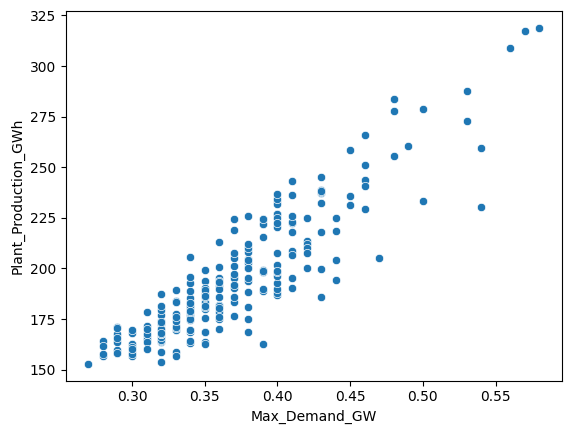

In [10]:
sns.scatterplot(x="Max_Demand_GW", y="Plant_Production_GWh", data=full_dataset)

**Linear Regression Model**  
  
Based on the previous scatter plot the correlation between the feature and target variable is linear, therefor a Linear Regression Model will be applied.

In [11]:
features = ["Max_Demand_GW"]
targets = ["Plant_Production_GWh"]

linear_model = LinearRegression()
linear_model.fit(training_data[features], training_data[targets])

linear_model_plant_production_predictions = linear_model.predict(test_data[features])

print(f"Linear model R2 score: {r2_score(test_data[targets], linear_model_plant_production_predictions)}")

Linear model R2 score: 0.7711203331037


**Plot the Predictions vs True Values**

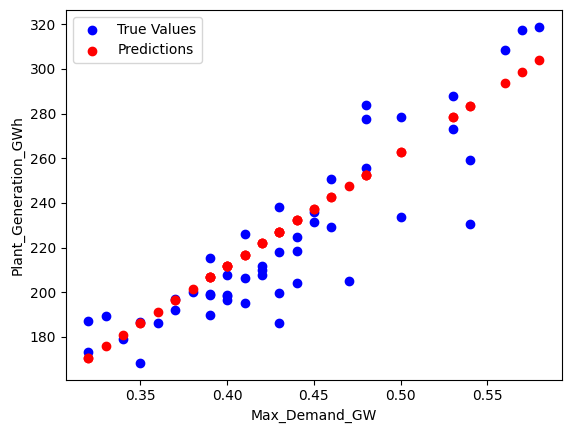

In [12]:
plt.scatter(test_data[features], test_data[targets], color="blue", label="True Values")
plt.scatter(test_data[features], linear_model_plant_production_predictions, color="red", label="Predictions")
plt.xlabel("Max_Demand_GW")
plt.ylabel("Plant_Generation_GWh")
plt.legend()
plt.show()

**Calculating Different Metrics on the Linear Model** 

In [13]:
# Calculating the MSE on the test dataset using the linear model
mse_test = mean_squared_error(test_data[targets], linear_model_plant_production_predictions)
print(f"Mean Squared Error on test dataset: {mse_test}")

# Calculating the MAE on the test dataset using the linear model
mae_test= mean_absolute_error(test_data[targets], linear_model_plant_production_predictions)
print(f"\nMean Absolute Error on test dataset: {mae_test}")

# Calculating the MAPE on the test dataset using the linear model
mape = mean_absolute_percentage_error(test_data[targets], linear_model_plant_production_predictions)
print(f"\nMAPE on test dataset: {mape:.2f}%")

Mean Squared Error on test dataset: 329.0934033386115

Mean Absolute Error on test dataset: 14.223788444008028

MAPE on test dataset: 6.46%


**Predicting Plant Production from the Predicted Max Demand Over Time**

c:\Users\worker\.conda\envs\aml\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


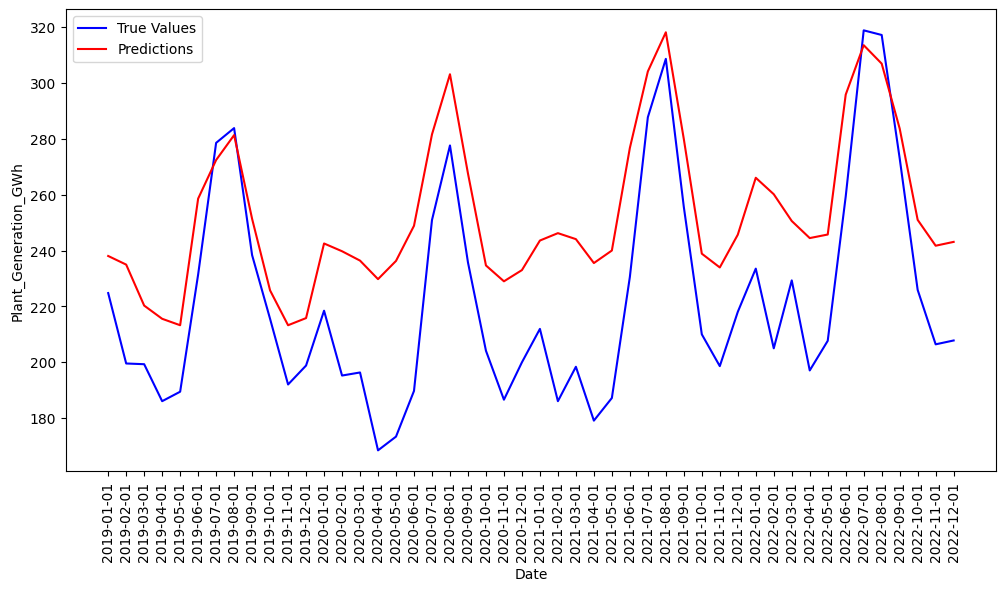

In [14]:
plant_production_predictions = linear_model.predict(nonlinear_model_max_demand_predictions)

# Plot results
plt.figure(figsize=(12,6))
plt.plot(test_data["Date"], test_data["Plant_Production_GWh"], color="blue", label="True Values")
plt.plot(test_data["Date"], plant_production_predictions, color="red", label="Predictions")
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Plant_Generation_GWh")
plt.legend()
plt.show()

**Calculating Different Metrics of Precicted Plant Production vs Actual Plant Production Over Time**

In [15]:
# Calculating the MSE on the test dataset using the linear model
mse_test = mean_squared_error(test_data[targets], plant_production_predictions)
print(f"Mean Squared Error on test dataset: {mse_test}")

# Calculating the MAE on the test dataset using the linear model
mae_test= mean_absolute_error(test_data[targets], plant_production_predictions)
print(f"\nMean Absolute Error on test dataset: {mae_test}")

# Calculating the MAPE on the test dataset using the linear model
mape = mean_absolute_percentage_error(test_data[targets], plant_production_predictions)
print(f"\nMAPE on test dataset: {mape:.2f}%")

Mean Squared Error on test dataset: 1218.539807756976

Mean Absolute Error on test dataset: 31.131239666128455

MAPE on test dataset: 15.16%
